# Dose Response Plots

Here we generate all plots related to dose-response experiments used in the manuscript, including the supplement.

We begin by importing required packages.

In [1]:
import numpy as np
import libraries.utilities as util

tables_dir = "latex-tables/"
figures_dir = "generated-plots/dose-response-supplement/"
data_dir = "generated-data/dose-response/"

ModuleNotFoundError: No module named 'statannotations'

## Plotting Absolute IC50 and Max (height) diff Figures 

### Bowl-shaped effect, without using negative controls to estimate the curves

In [2]:
## To get the same y axis in subplots in the same figure
y_max_absic = 0.75
y_max_d_diff = 45

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.563e-52 t=1.523e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:5.899e-44 t=1.396e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.753e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.562e-80 t=1.900e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.539e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.254e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.964e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.247e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

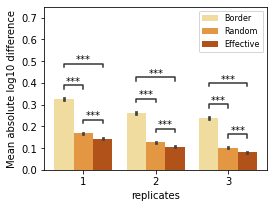

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.563e-52 t=1.523e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:5.899e-44 t=1.396e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.753e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.562e-80 t=1.900e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.539e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.254e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.964e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.247e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

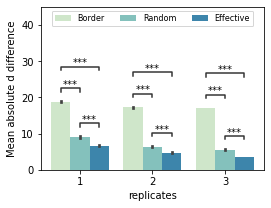

In [3]:
# 6 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-6doses-dil18-bowl-0.055"

## Data files
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.397e-55 t=1.570e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.010e-56 t=1.584e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.786e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:8.598e-100 t=2.127e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.403e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.015e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.073e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.729e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

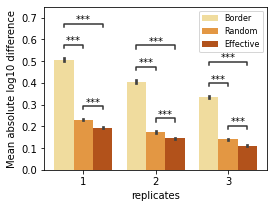

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.397e-55 t=1.570e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.010e-56 t=1.584e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.786e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:8.598e-100 t=2.127e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.403e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.015e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.073e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.729e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

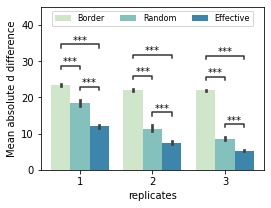

In [4]:
# 6 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-6doses-dil18-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.564e-79 t=1.897e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.991e-72 t=1.810e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.188e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.869e-106 t=2.194e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=8.060e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.634e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.445e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.495e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

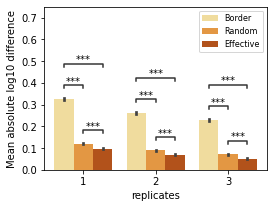

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.564e-79 t=1.897e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.991e-72 t=1.810e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.188e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.869e-106 t=2.194e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=8.060e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.634e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.445e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.495e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

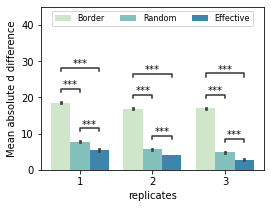

In [5]:
# 8 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-8doses-dil8-bowl-0.055"

absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.966e-89 t=2.017e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.547e-83 t=1.948e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.827e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.548e-122 t=2.366e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.927e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.318e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.139e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.127e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

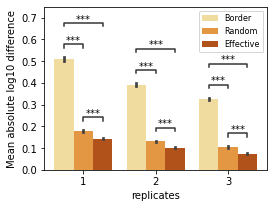

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.966e-89 t=2.017e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.547e-83 t=1.948e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.827e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.548e-122 t=2.366e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.927e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.318e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.139e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.127e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

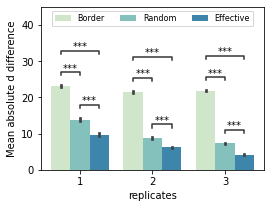

In [6]:
# 8 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-8doses-dil8-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.621e-77 t=1.881e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.279e-127 t=2.452e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.281e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.106e-102 t=2.156e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.243e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.349e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.644e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.021e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

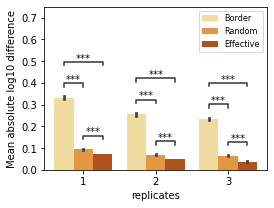

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.621e-77 t=1.881e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.279e-127 t=2.452e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.281e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.106e-102 t=2.156e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.243e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.349e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.644e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.021e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

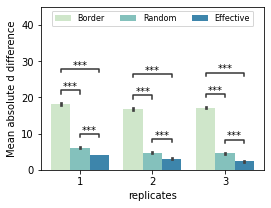

In [7]:
# 12 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-12doses-dil4-bowl-0.055"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.523e-80 t=1.919e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.641e-125 t=2.437e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.988e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.991e-90 t=2.023e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.810e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.268e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.195e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.877e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

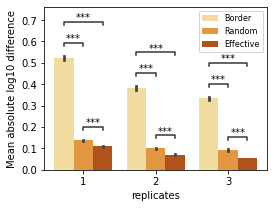

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.523e-80 t=1.919e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.641e-125 t=2.437e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.988e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.991e-90 t=2.023e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.810e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.268e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.195e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.877e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

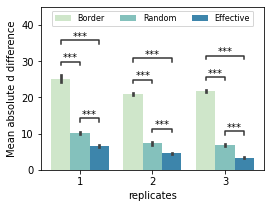

In [8]:
# 12 doses. Not using neg controls when estimating the curve. (currently on the supplement)
fig_name = "-12doses-dil4-bowl-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff)


### Bowl-shaped effect, using 4 neg controls when estimating the curve

In [9]:
## To get the same y axis in subplots in the same figure
y_max_absic = 1.4
y_max_d_diff = 200

leg_ncol_d_diff = 1
leg_loc_d_diff = "upper right"

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.587e-57 t=1.595e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.134e-54 t=1.560e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.245e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:3.521e-89 t=2.008e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.016e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.059e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.327e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.742e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

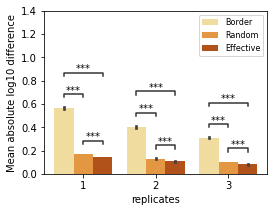

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.587e-57 t=1.595e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.134e-54 t=1.560e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.245e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:3.521e-89 t=2.008e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.016e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.059e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.327e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=7.742e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

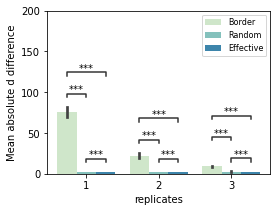

In [10]:
# 6 doses. Using 4 neg controls when estimating the curve. (currently on the supplement)
fig_name = "-6doses-dil18-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.257e-60 t=1.641e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.017e-68 t=1.755e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.713e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.822e-112 t=2.262e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.131e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=8.021e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.698e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.584e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

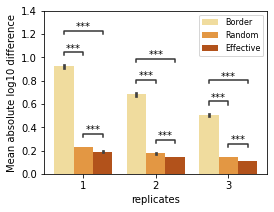

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.257e-60 t=1.641e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.017e-68 t=1.755e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.713e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.822e-112 t=2.262e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.131e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=8.021e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.698e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.584e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

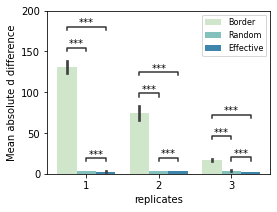

In [11]:
# 6 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-6doses-dil18-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.145e-97 t=2.109e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.796e-77 t=1.875e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.079e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.184e-120 t=2.339e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.024e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.457e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.122e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.091e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

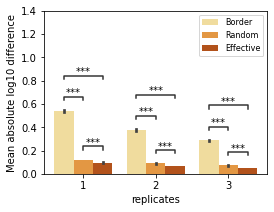

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.145e-97 t=2.109e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.796e-77 t=1.875e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.079e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.184e-120 t=2.339e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.024e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.457e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.122e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.091e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

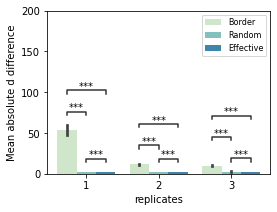

In [12]:
# 8 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-8doses-dil8-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.680e-106 t=2.206e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.678e-90 t=2.039e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.857e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.070e-123 t=2.374e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.078e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.848e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.803e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.397e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

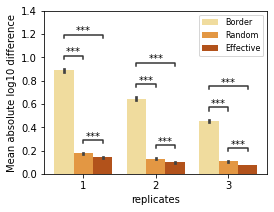

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.680e-106 t=2.206e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.678e-90 t=2.039e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.857e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.070e-123 t=2.374e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.078e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.848e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=8.803e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.397e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

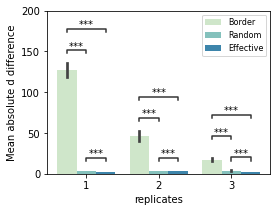

In [13]:
# 8 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-8doses-dil8-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.902e-86 t=1.986e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.550e-129 t=2.476e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.751e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.434e-126 t=2.411e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=8.585e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.163e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.906e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.715e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

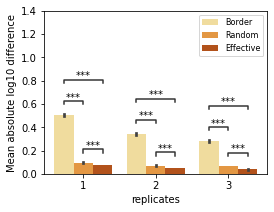

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.902e-86 t=1.986e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.550e-129 t=2.476e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=6.751e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.434e-126 t=2.411e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=8.585e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=6.163e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.906e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.715e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

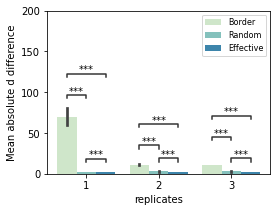

In [14]:
# 12 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-12doses-dil4-bowl-neg-controls-0.055"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:8.470e-172 t=2.823e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.037e-252 t=3.473e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.710e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.486e-222 t=3.204e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.166e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=8.168e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.010e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.821e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

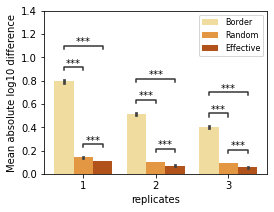

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:8.470e-172 t=2.823e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.037e-252 t=3.473e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.710e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.486e-222 t=3.204e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.166e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=8.168e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.010e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=8.821e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

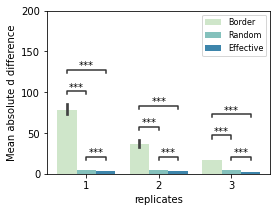

In [15]:
# 12 doses (currently on the paper. Using 4 neg controls in the curve)
fig_name = "-12doses-dil4-bowl-neg-controls-0.085"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


## Half columns

Figure 2 in the manuscript

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.970e-57 t=1.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.137e-72 t=1.807e+01
3_Border vs. 3_Random: t-test independent samples, P_val:7.129e-146 t=2.617e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:5.964e-58 t=1.608e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.806e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.636e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:4.962e-214 t=3.204e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.017e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

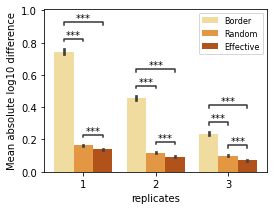

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.970e-57 t=1.600e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.137e-72 t=1.807e+01
3_Border vs. 3_Random: t-test independent samples, P_val:7.129e-146 t=2.617e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:5.964e-58 t=1.608e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.806e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.636e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:4.962e-214 t=3.204e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.017e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

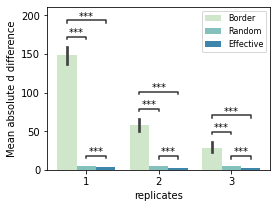

In [16]:
# 8 doses (currently on the paper)
fig_name = "-8doses-dil8-right-half-neg-controls-0.4_paper"

absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, leg_ncol_d_diff=1,leg_loc_d_diff="upper right")


## Half column (supplement)

### Weaker plate effect

In [17]:
## To get the same y axis in subplots in the same figure
y_max_absic = 1.1
y_max_d_diff = 230

leg_ncol_d_diff = 1
leg_loc_d_diff = "upper right"

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.433e-38 t=1.289e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.842e-56 t=1.586e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.286e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.117e-47 t=1.453e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.415e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.382e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=5.017e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.759e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

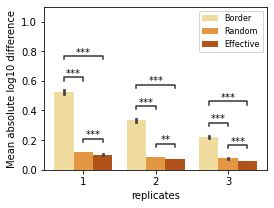

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.433e-38 t=1.289e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.842e-56 t=1.586e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.286e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.117e-47 t=1.453e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.415e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.382e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=5.017e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.759e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

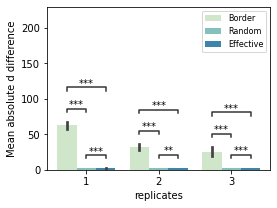

In [18]:
# 6 doses (currently part of the supplement)
fig_name = "-6doses-dil18-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.272e-57 t=1.597e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.309e-78 t=1.884e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.239e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.096e-51 t=1.516e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.758e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.139e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=4.898e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.502e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

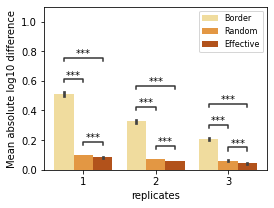

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.272e-57 t=1.597e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.309e-78 t=1.884e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.239e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.096e-51 t=1.516e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.758e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.139e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=4.898e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.502e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

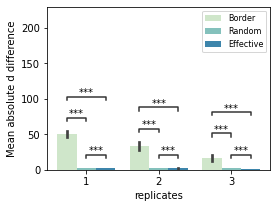

In [19]:
# 8 doses (currently part of the supplement)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.942e-98 t=2.130e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.616e-63 t=1.701e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.094e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.874e-120 t=2.350e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.620e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.418e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=4.699e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.832e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

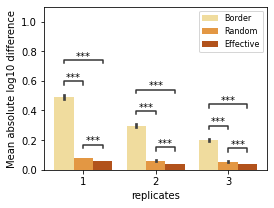

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.942e-98 t=2.130e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.616e-63 t=1.701e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=4.094e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.874e-120 t=2.350e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.620e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.418e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=4.699e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.832e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

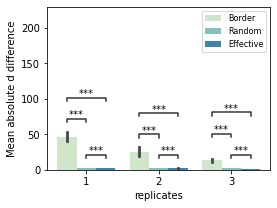

In [20]:
# 12 doses (currently part of the supplement)
fig_name = "-12doses-dil4-half-columns-neg-controls-0.2"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


### Stronger plate effect

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:5.049e-32 t=1.180e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.808e-62 t=1.673e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.211e-138 t=2.538e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:5.240e-58 t=1.608e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.401e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.760e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:8.341e-223 t=3.251e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.109e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

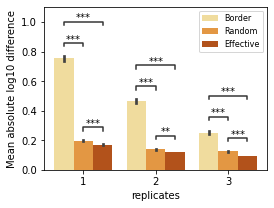

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:5.049e-32 t=1.180e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.808e-62 t=1.673e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.211e-138 t=2.538e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:5.240e-58 t=1.608e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.401e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.760e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:8.341e-223 t=3.251e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.109e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

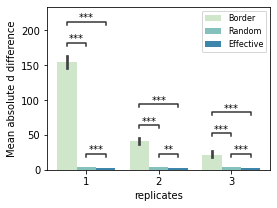

In [21]:
# 6 doses (currently part of the supplement)
fig_name = "-6doses-dil18-half-columns-neg-controls-0.4"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)

## 3 replicates
util.create_latex_table_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")
util.create_latex_table_pvalues_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"pvalues-absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.578e-58 t=1.611e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.466e-72 t=1.812e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.720e-146 t=2.623e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.131e-58 t=1.615e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.805e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.630e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:7.136e-215 t=3.210e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.013e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

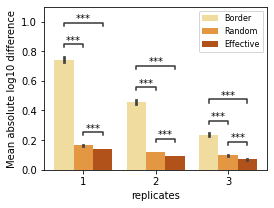

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.578e-58 t=1.611e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.466e-72 t=1.812e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.720e-146 t=2.623e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.131e-58 t=1.615e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.805e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.630e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:7.136e-215 t=3.210e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=5.013e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

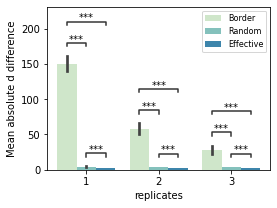

In [22]:
# 8 doses (currently part of the paper)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.4"

absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-36-8-dil8-1-0.4-20220504-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)

## 3 replicates
util.create_latex_table_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")
util.create_latex_table_pvalues_wide(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, tables_dir+"pvalues-absic50-table"+fig_name+".tex", table_text = "Absolute \\ECIC{}", column_name="MSE")


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.582e-93 t=2.066e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:9.351e-67 t=1.746e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.052e-138 t=2.570e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.444e-134 t=2.489e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.659e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=3.947e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:5.307e-203 t=3.153e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.376e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

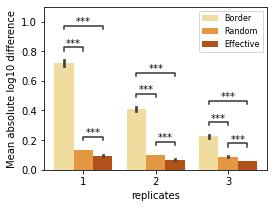

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.582e-93 t=2.066e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:9.351e-67 t=1.746e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.052e-138 t=2.570e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.444e-134 t=2.489e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.659e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=3.947e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:5.307e-203 t=3.153e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.376e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

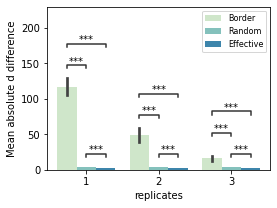

In [23]:
# 12 doses (part of the supplement)
fig_name = "-12doses-dil4-half-columns-neg-controls-0.4"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.105e-93 t=2.076e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.511e-68 t=1.761e+01
3_Border vs. 3_Random: t-test independent samples, P_val:2.333e-137 t=2.557e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.799e-134 t=2.482e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.661e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=3.958e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.275e-201 t=3.142e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.388e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

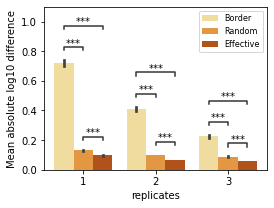

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.105e-93 t=2.076e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:8.511e-68 t=1.761e+01
3_Border vs. 3_Random: t-test independent samples, P_val:2.333e-137 t=2.557e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.799e-134 t=2.482e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.661e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=3.958e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.275e-201 t=3.142e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.388e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

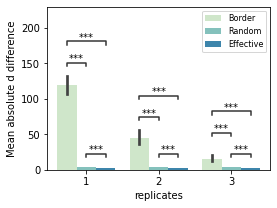

In [24]:
# 12 doses (another simulation, similar results)
fig_name = "-12doses-dil4-half-columns-neg-controls-0.4-b"
absolute_ic50_data_1rep = np.loadtxt(data_dir+'absolute_ic50_data-24-12-dil4-1-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_2rep = np.loadtxt(data_dir+'absolute_ic50_data-12-12-dil4-2-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')
absolute_ic50_data_3rep = np.loadtxt(data_dir+'absolute_ic50_data-8-12-dil4-3-0.4-20220315-log-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_absic50_ddiff_tables(absolute_ic50_data_1rep, absolute_ic50_data_2rep, absolute_ic50_data_3rep, fig_name, figures_dir, tables_dir, y_max_absic,
y_max_d_diff,leg_ncol_d_diff,leg_loc_d_diff)


## Plotting the relative EC50/IC50 and the percentage of low-quality curves 

Low-quality curves are those with $R^2<0.8$

In [25]:
y_max_relic = 0.83
y_max_r2 = 30

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.651e-38 t=1.301e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:7.380e-28 t=1.097e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=-4.715e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.345e-70 t=1.777e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=-6.392e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=-3.987e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=-4.117e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:2.055e-216 t=-3.181e+01
1_Border vs. 1_Effective: t-test independent samples, P

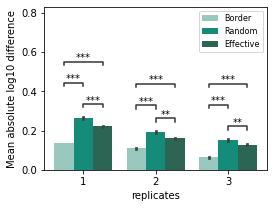

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 0.0], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 2.8854166666666665], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 4.140625]]


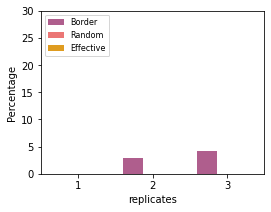

In [26]:
# 6 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-6doses-dil18-bowl-0.055"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:5.470e-32 t=1.179e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.125e-34 t=1.232e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=-4.108e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.163e-53 t=1.536e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=-4.562e+01
2_Border vs. 2_Random: t-test independent samples, P_val:1.036e-194 t=-3.011e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=-3.939e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:2.586e-148 t=-2.617e+01
1_Border vs. 1_Effective: t-test independent samples, 

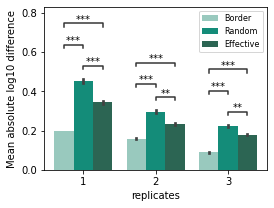

[['Effective', 1, 0.06944444444444445], ['Random', 1, 0.2604166666666667], ['Border', 1, 0.0], ['Effective', 2, 0.020833333333333332], ['Random', 2, 0.7083333333333334], ['Border', 2, 15.104166666666666], ['Effective', 3, 0.0], ['Random', 3, 0.75], ['Border', 3, 27.203125]]


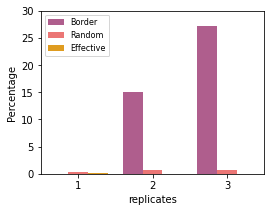

In [27]:
# 6 doses (currently on the supplement. Does not use neg controls, only compound points)
fig_name = "-6doses-dil18-bowl-0.085"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.263e-18 t=8.755e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.923e-18 t=8.780e+00
3_Border vs. 3_Random: t-test independent samples, P_val:2.795e-74 t=-1.839e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.542e-53 t=1.537e+01
1_Border vs. 1_Random: t-test independent samples, P_val:2.477e-21 t=-9.490e+00
2_Border vs. 2_Random: t-test independent samples, P_val:1.554e-08 t=5.659e+00
3_Border vs. 3_Effective: t-test independent samples, P_val:3.302e-24 t=-1.018e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.014e-53 t=1.550e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

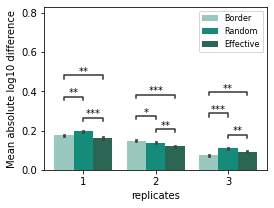

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 0.0], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 3.9444444444444446], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 3.9791666666666665]]


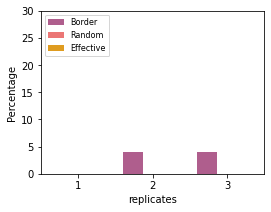

In [28]:
# 8 doses (currently on the supplement. Does not use neg controls, only compound points)
fig_name = "-8doses-dil8-bowl-0.055"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.643e-20 t=9.246e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.559e-24 t=1.020e+01
3_Border vs. 3_Random: t-test independent samples, P_val:3.923e-85 t=-1.975e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.313e-28 t=1.111e+01
1_Border vs. 1_Random: t-test independent samples, P_val:3.656e-56 t=-1.582e+01
2_Border vs. 2_Random: t-test independent samples, P_val:2.564e-02 t=2.232e+00
3_Border vs. 3_Effective: t-test independent samples, P_val:3.191e-24 t=-1.018e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:9.215e-39 t=1.306e+01
1_Border vs. 1_Effective: t-test independent samples, P_va

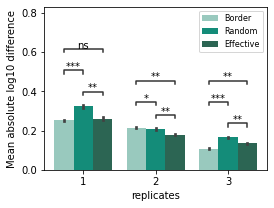

[['Effective', 1, 0.0], ['Random', 1, 0.4652777777777778], ['Border', 1, 0.10416666666666667], ['Effective', 2, 0.0], ['Random', 2, 0.2638888888888889], ['Border', 2, 15.88888888888889], ['Effective', 3, 0.0], ['Random', 3, 0.2708333333333333], ['Border', 3, 23.3125]]


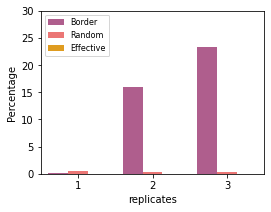

In [29]:
# 8 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-8doses-dil8-bowl-0.085"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2, pvalue_thresholds=pvalue_thresholds)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.831e-19 t=8.994e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.576e-31 t=1.175e+01
3_Border vs. 3_Random: t-test independent samples, P_val:5.909e-01 t=-5.376e-01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.143e-19 t=9.084e+00
1_Border vs. 1_Random: t-test independent samples, P_val:1.142e-171 t=2.822e+01
2_Border vs. 2_Random: t-test independent samples, P_val:9.841e-168 t=2.816e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:2.267e-21 t=9.526e+00
2_Border vs. 2_Effective: t-test independent samples, P_val:1.086e-300 t=3.843e+01
1_Border vs. 1_Effective: t-test independent samples, P_v

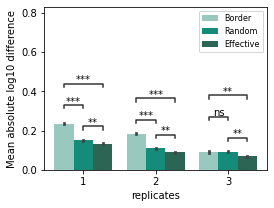

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 0.0], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 3.6041666666666665], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 3.9375]]


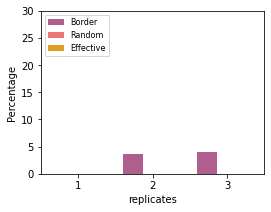

In [30]:
# 12 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-12doses-dil4-bowl-0.055"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2, pvalue_thresholds=pvalue_thresholds)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.434e-17 t=8.549e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 5.00e-02
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.011e-29 t=1.138e+01
3_Border vs. 3_Random: t-test independent samples, P_val:8.870e-02 t=1.703e+00
1_Random vs. 1_Effective: t-test independent samples, P_val:4.196e-14 t=7.560e+00
1_Border vs. 1_Random: t-test independent samples, P_val:3.753e-71 t=1.791e+01
2_Border vs. 2_Random: t-test independent samples, P_val:3.086e-127 t=2.436e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:4.609e-23 t=9.928e+00
2_Border vs. 2_Effective: t-test independent samples, P_val:1.962e-288 t=3.758e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

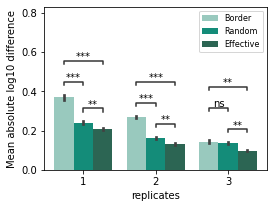

[['Effective', 1, 0.1875], ['Random', 1, 1.0729166666666667], ['Border', 1, 0.0], ['Effective', 2, 0.0], ['Random', 2, 0.5833333333333334], ['Border', 2, 20.125], ['Effective', 3, 0.0], ['Random', 3, 0.6875], ['Border', 3, 20.65625]]


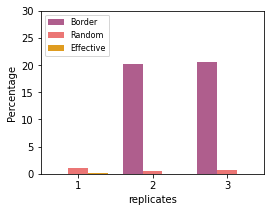

In [31]:
# 12 doses (currently on the appendix. Does not use neg controls, only compound points)
fig_name = "-12doses-dil4-bowl-0.085"
pvalue_thresholds = [[1e-43, "***"], [1e-12, "**"], [0.05, "*"], [1, "ns"]]

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2, pvalue_thresholds=pvalue_thresholds)


### Bowl-shaped effect, using negative controls when estimating the curves

In [32]:
y_max_relic = 10.7
y_max_r2 = 40

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.056e-33 t=1.197e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.092e-19 t=9.094e+00
3_Border vs. 3_Random: t-test independent samples, P_val:3.241e-36 t=1.261e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.187e-17 t=8.488e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.501e+01
2_Border vs. 2_Random: t-test independent samples, P_val:1.735e-177 t=2.871e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:2.359e-39 t=1.317e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.666e-181 t=2.904e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

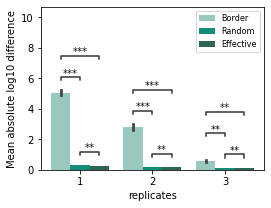

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 1.7604166666666667], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 4.739583333333333], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 4.75]]


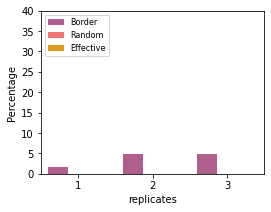

In [33]:
# 6 doses (currently on the supplement. Using 4 negative controls)
fig_name = "-6doses-dil18-bowl-neg-controls-0.055"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.513e-28 t=1.103e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:6.732e-24 t=1.010e+01
3_Border vs. 3_Random: t-test independent samples, P_val:2.932e-123 t=2.387e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:7.547e-15 t=7.778e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.750e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=4.480e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.839e-126 t=2.419e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=4.518e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

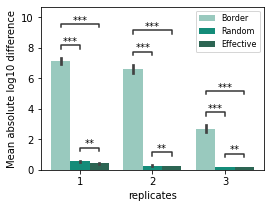

[['Effective', 1, 0.08680555555555555], ['Random', 1, 0.6614583333333334], ['Border', 1, 11.125], ['Effective', 2, 0.0625], ['Random', 2, 0.84375], ['Border', 2, 27.041666666666668], ['Effective', 3, 0.0], ['Random', 3, 0.875], ['Border', 3, 36.421875]]


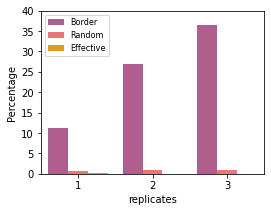

In [34]:
# 6 doses (currently on the supplement. Using 4 negative controls)
fig_name = "-6doses-dil18-bowl-neg-controls-0.085"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.693e-14 t=7.548e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:7.132e-15 t=7.795e+00
3_Border vs. 3_Random: t-test independent samples, P_val:5.241e-29 t=1.121e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:2.295e-37 t=1.279e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=4.724e+01
2_Border vs. 2_Random: t-test independent samples, P_val:1.657e-125 t=2.407e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.528e-31 t=1.173e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.192e-127 t=2.428e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

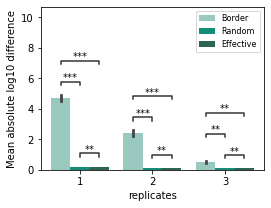

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 2.3819444444444446], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 5.180555555555555], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 4.083333333333333]]


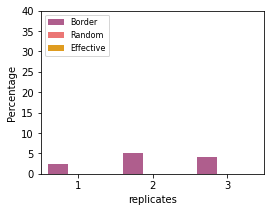

In [35]:
# 8 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-8doses-dil8-bowl-neg-controls-0.055"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:6.791e-05 t=3.985e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.584e-15 t=7.882e+00
3_Border vs. 3_Random: t-test independent samples, P_val:1.833e-66 t=1.736e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:6.050e-13 t=7.203e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.906e+01
2_Border vs. 2_Random: t-test independent samples, P_val:1.018e-280 t=3.661e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:4.157e-69 t=1.771e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:2.202e-285 t=3.693e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

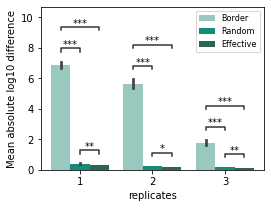

[['Effective', 1, 0.0], ['Random', 1, 0.5763888888888888], ['Border', 1, 11.520833333333334], ['Effective', 2, 0.0], ['Random', 2, 0.3055555555555556], ['Border', 2, 28.680555555555557], ['Effective', 3, 0.0], ['Random', 3, 0.2708333333333333], ['Border', 3, 31.6875]]


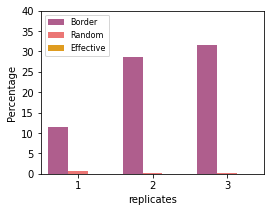

In [36]:
# 8 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-8doses-dil8-bowl-neg-controls-0.085"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.404e-16 t=8.078e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.146e-28 t=1.116e+01
3_Border vs. 3_Random: t-test independent samples, P_val:2.819e-29 t=1.129e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.755e-22 t=9.767e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=3.943e+01
2_Border vs. 2_Random: t-test independent samples, P_val:8.970e-104 t=2.190e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:7.354e-35 t=1.239e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.813e-105 t=2.208e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

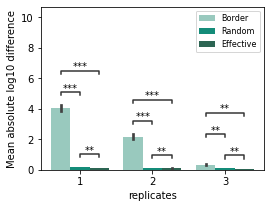

[['Effective', 1, 0.0], ['Random', 1, 0.0], ['Border', 1, 1.8854166666666667], ['Effective', 2, 0.0], ['Random', 2, 0.0], ['Border', 2, 5.4375], ['Effective', 3, 0.0], ['Random', 3, 0.0], ['Border', 3, 4.25]]


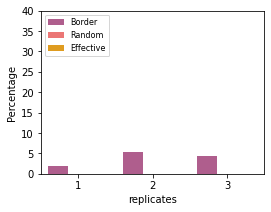

In [37]:
# 12 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-12doses-dil4-bowl-neg-controls-0.055"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.055-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:7.203e-28 t=1.096e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.623e-30 t=1.147e+01
3_Border vs. 3_Random: t-test independent samples, P_val:4.737e-78 t=1.883e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:5.377e-34 t=1.217e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=6.276e+01
2_Border vs. 2_Random: t-test independent samples, P_val:3.269e-256 t=3.472e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:9.038e-86 t=1.978e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:7.231e-261 t=3.505e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

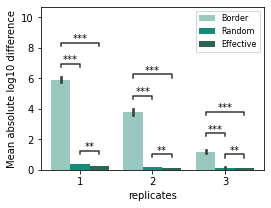

[['Effective', 1, 0.17708333333333334], ['Random', 1, 1.1927083333333333], ['Border', 1, 7.78125], ['Effective', 2, 0.0], ['Random', 2, 0.625], ['Border', 2, 22.145833333333332], ['Effective', 3, 0.0], ['Random', 3, 0.75], ['Border', 3, 23.890625]]


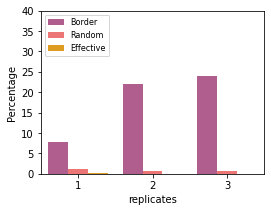

In [38]:
# 12 doses (currently on the appendix. Using 4 negative controls)
fig_name = "-12doses-dil4-bowl-neg-controls-0.085"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.085-20220308-bowl-neg-control-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


## Half Columns

### Weaker plate effects


In [39]:
y_max_relic = 7.1
y_max_r2 = 35

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:3.786e-07 t=5.081e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.741e-19 t=8.993e+00
3_Border vs. 3_Random: t-test independent samples, P_val:4.984e-35 t=1.239e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:8.885e-06 t=4.443e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.323e+01
2_Border vs. 2_Random: t-test independent samples, P_val:5.811e-172 t=2.824e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:6.236e-37 t=1.274e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:3.492e-173 t=2.835e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

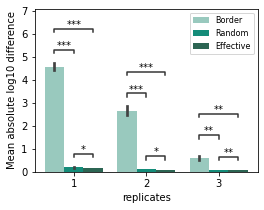

[['Effective', 1, 0.0], ['Random', 1, 0.59375], ['Border', 1, 7.286458333333333], ['Effective', 2, 0.0], ['Random', 2, 0.7916666666666666], ['Border', 2, 18.21875], ['Effective', 3, 0.0], ['Random', 3, 0.1875], ['Border', 3, 17.515625]]


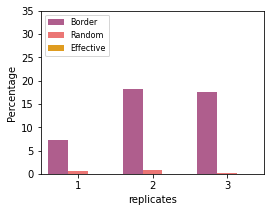

In [40]:
# 6 doses (part of the supplement)
fig_name = "-6doses-dil18-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:4.165e-13 t=7.257e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:2.845e-36 t=1.263e+01
3_Border vs. 3_Random: t-test independent samples, P_val:2.243e-25 t=1.044e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.046e-21 t=9.580e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=4.559e+01
2_Border vs. 2_Random: t-test independent samples, P_val:1.095e-128 t=2.438e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:6.650e-27 t=1.077e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:6.416e-130 t=2.450e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

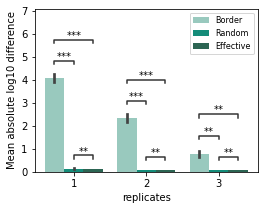

[['Effective', 1, 0.0], ['Random', 1, 0.9513888888888888], ['Border', 1, 6.944444444444445], ['Effective', 2, 0.0], ['Random', 2, 1.2916666666666667], ['Border', 2, 18.75], ['Effective', 3, 0.0], ['Random', 3, 1.125], ['Border', 3, 18.625]]


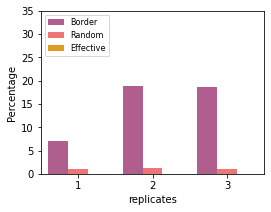

In [41]:
# 8 doses (part of the supplement)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:5.383e-09 t=5.840e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:5.245e-06 t=4.559e+00
3_Border vs. 3_Random: t-test independent samples, P_val:3.290e-19 t=8.987e+00
1_Random vs. 1_Effective: t-test independent samples, P_val:1.393e-23 t=1.002e+01
1_Border vs. 1_Random: t-test independent samples, P_val:2.382e-274 t=3.598e+01
2_Border vs. 2_Random: t-test independent samples, P_val:5.522e-85 t=1.973e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.183e-19 t=9.100e+00
2_Border vs. 2_Effective: t-test independent samples, P_val:1.330e-85 t=1.981e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:

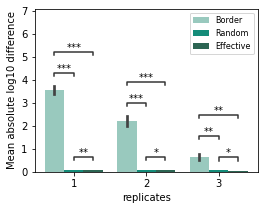

[['Effective', 1, 0.0], ['Random', 1, 1.3020833333333333], ['Border', 1, 7.3125], ['Effective', 2, 0.0], ['Random', 2, 1.375], ['Border', 2, 20.0625], ['Effective', 3, 0.0], ['Random', 3, 1.28125], ['Border', 3, 19.1875]]


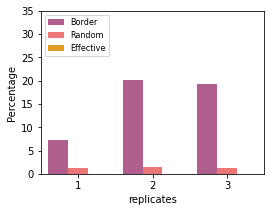

In [42]:
# 12 doses (part of the supplement)
fig_name = "-12doses-dil4-half-columns-neg-controls-0.2"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


### Stronger plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:2.714e-01 t=1.100e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:7.555e-07 t=4.949e+00
3_Border vs. 3_Random: t-test independent samples, P_val:2.342e-36 t=1.263e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.224e-18 t=8.817e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.036e+01
2_Border vs. 2_Random: t-test independent samples, P_val:4.040e-206 t=3.101e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.164e-43 t=1.391e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:8.939e-209 t=3.122e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

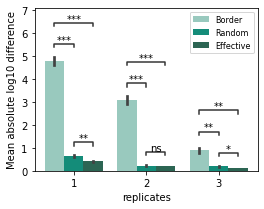

[['Effective', 1, 1.0416666666666667], ['Random', 1, 5.109375], ['Border', 1, 15.40625], ['Effective', 2, 0.23958333333333334], ['Random', 2, 5.552083333333333], ['Border', 2, 30.604166666666668], ['Effective', 3, 0.015625], ['Random', 3, 6.203125], ['Border', 3, 29.734375]]


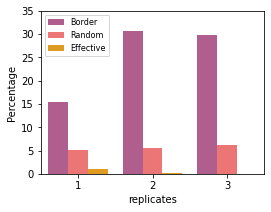

In [43]:
# 6 doses (part of the supplement)
fig_name = "-6doses-dil18-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.181e-10 t=6.447e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.142e-28 t=1.105e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.127e-23 t=1.006e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.376e-25 t=1.036e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=4.543e+01
2_Border vs. 2_Random: t-test independent samples, P_val:4.318e-168 t=2.801e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:3.094e-26 t=1.063e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.117e-176 t=2.874e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

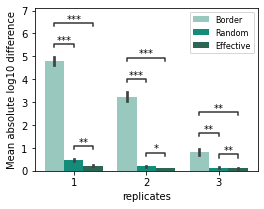

[['Effective', 1, 0.7777777777777778], ['Random', 1, 6.055555555555555], ['Border', 1, 15.805555555555555], ['Effective', 2, 0.1527777777777778], ['Random', 2, 6.736111111111111], ['Border', 2, 32.44444444444444], ['Effective', 3, 0.0], ['Random', 3, 6.166666666666667], ['Border', 3, 29.104166666666668]]


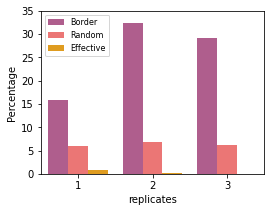

In [44]:
# 8 doses (part of the supplement)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.579e-08 t=5.658e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.057e-06 t=4.885e+00
3_Border vs. 3_Random: t-test independent samples, P_val:7.162e-19 t=8.900e+00
1_Random vs. 1_Effective: t-test independent samples, P_val:3.463e-23 t=9.931e+00
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=3.848e+01
2_Border vs. 2_Random: t-test independent samples, P_val:4.363e-94 t=2.081e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:1.074e-19 t=9.111e+00
2_Border vs. 2_Effective: t-test independent samples, P_val:4.430e-95 t=2.092e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0

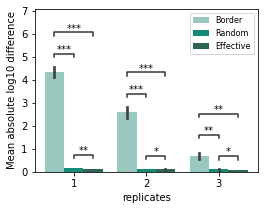

[['Effective', 1, 0.125], ['Random', 1, 6.9375], ['Border', 1, 15.5625], ['Effective', 2, 0.0625], ['Random', 2, 6.9375], ['Border', 2, 32.6875], ['Effective', 3, 0.0], ['Random', 3, 8.3125], ['Border', 3, 32.90625]]


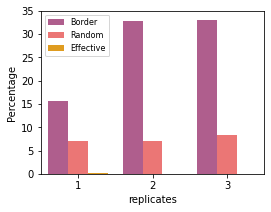

In [45]:
# 12 doses (part of the supplement)
fig_name = "-12doses-dil4-half-columns-neg-controls-0.4"
relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir, y_max_relic = y_max_relic, y_max_r2 = y_max_r2)

### Manuscript

Figure 2

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

2_Random vs. 2_Effective: t-test independent samples, P_val:1.181e-10 t=6.447e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.142e-28 t=1.105e+01
3_Border vs. 3_Random: t-test independent samples, P_val:1.127e-23 t=1.006e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.376e-25 t=1.036e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=4.543e+01
2_Border vs. 2_Random: t-test independent samples, P_val:4.318e-168 t=2.801e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:3.094e-26 t=1.063e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:1.117e-176 t=2.874e+01
1_Border vs. 1_Effective: t-test independent samples, P_val

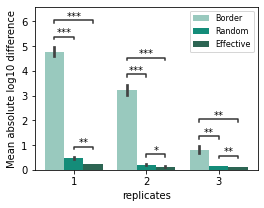

[['Effective', 1, 0.7777777777777778], ['Random', 1, 6.055555555555555], ['Border', 1, 15.805555555555555], ['Effective', 2, 0.1527777777777778], ['Random', 2, 6.736111111111111], ['Border', 2, 32.44444444444444], ['Effective', 3, 0.0], ['Random', 3, 6.166666666666667], ['Border', 3, 29.104166666666668]]


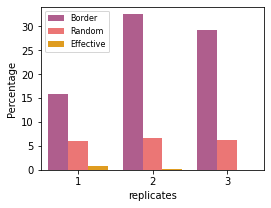

In [46]:
# 8 doses (part of the supplement)
fig_name = "-8doses-dil8-half-columns-neg-controls-0.4_paper"

relative_ic50_data_1rep = np.loadtxt(data_dir+'relative_ic50_data-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_2rep = np.loadtxt(data_dir+'relative_ic50_data-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
relative_ic50_data_3rep = np.loadtxt(data_dir+'relative_ic50_data-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.generate_relic50_r2(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, fig_name, figures_dir)

## 3 replicates
util.create_latex_table_wide(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, tables_dir+"relic50-table"+fig_name+".tex", table_text = "Relative \\ECIC{}", column_name="MSE")
util.create_latex_table_pvalues_wide(relative_ic50_data_1rep, relative_ic50_data_2rep, relative_ic50_data_3rep, tables_dir+"pvalues-relic50-table"+fig_name+".tex", table_text = "Relative \\ECIC{}", column_name="MSE")


## Evaluating Residuals

We now look at the residuals compared to the sigmoid used to generated the data

### Bowl-shaped plate effects

In [47]:
y_max_res = 720

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=5.550e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.293e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=5.696e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.285e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.284e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.729e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.700e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.664e+02


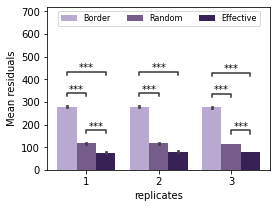

In [48]:
# 6 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-6doses-dil18-bowl-0.055"

residuals_1rep = np.loadtxt(data_dir+'residuals-48-6-dil18-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-24-6-dil18-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-16-6-dil18-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, leg_loc="upper center", fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=5.617e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.101e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=5.737e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.097e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.096e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.625e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.593e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.576e+02


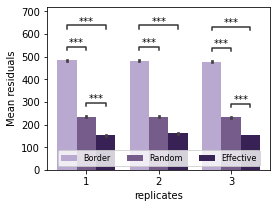

In [49]:
# 6 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-6doses-dil18-bowl-0.085"

residuals_1rep = np.loadtxt(data_dir+'residuals-48-6-dil18-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-24-6-dil18-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-16-6-dil18-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=5.912e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.310e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.673e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.311e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.312e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.746e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.754e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.792e+02


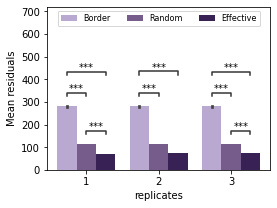

In [50]:
# 8 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.055"

residuals_1rep = np.loadtxt(data_dir+'residuals-36-8-dil8-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-18-8-dil8-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-12-8-dil8-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, leg_loc="upper center", fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.082e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.126e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.779e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.125e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.125e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.662e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.667e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.711e+02


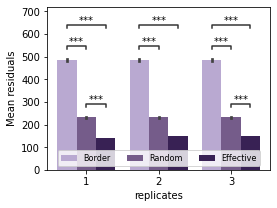

In [51]:
# 8 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-8doses-dil8-bowl-0.085"

residuals_1rep = np.loadtxt(data_dir+'residuals-36-8-dil8-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-18-8-dil8-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-12-8-dil8-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, fig_dir=figures_dir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.236e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.356e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=4.886e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.350e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.351e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.836e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.802e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.746e+02


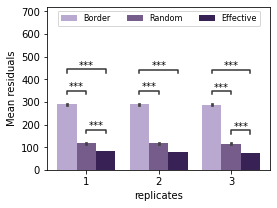

In [52]:
# 12 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.055"

residuals_1rep = np.loadtxt(data_dir+'residuals-24-12-dil4-1-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-12-12-dil4-2-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-8-12-dil4-3-0.055-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, leg_loc="upper center", fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.275e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=1.164e+02
1_Random vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=4.937e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=1.154e+02
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=1.154e+02
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=1.739e+02
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=1.691e+02
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=1.627e+02


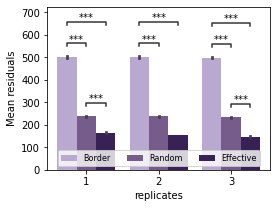

In [53]:
# 12 doses (currently on the supplement. Not using neg controls in the curve)
fig_name = "-1-2-3-12doses-dil4-bowl-0.085"

residuals_1rep = np.loadtxt(data_dir+'residuals-24-12-dil4-1-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-12-12-dil4-2-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-8-12-dil4-3-0.085-20220303-curve_info-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=y_max_res, fig_dir=figures_dir)


## Half columns

### Weaker plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:3.534e-236 t=3.285e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.784e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:1.918e-237 t=3.294e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.758e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.768e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.337e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=9.316e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=9.278e+01


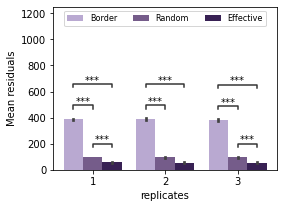

In [54]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.2"

residuals_1rep = np.loadtxt(data_dir+'residuals-48-6-dil18-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-24-6-dil18-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-16-6-dil18-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center", fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:9.894e-224 t=3.197e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=7.869e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.803e-190 t=2.943e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=7.868e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=7.867e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.591e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=9.566e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=9.488e+01


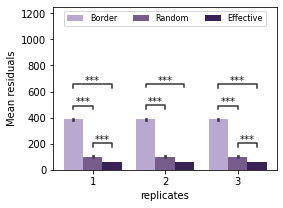

In [55]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.2"

residuals_1rep = np.loadtxt(data_dir+'residuals-36-8-dil8-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-18-8-dil8-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-12-8-dil8-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center", fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:5.093e-237 t=3.291e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=8.237e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:9.724e-219 t=3.160e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=8.142e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=8.150e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=9.791e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=9.632e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=9.641e+01


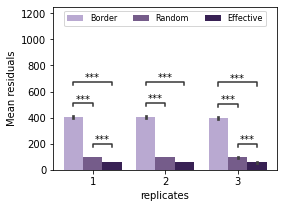

In [56]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.2"

residuals_1rep = np.loadtxt(data_dir+'residuals-24-12-dil4-1-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-12-12-dil4-2-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-8-12-dil4-3-0.2-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, leg_loc="upper center", fig_dir=figures_dir)


### Stronger plate effects

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.721e-241 t=3.323e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.502e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.715e-248 t=3.368e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.491e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.494e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.755e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.770e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.747e+01


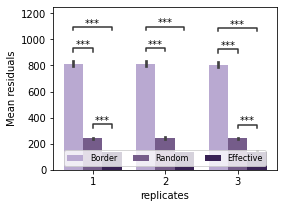

In [57]:
# 6 doses (part of the supplement)
fig_name = "-1-2-3-6doses-dil18-half-columns-neg-controls-0.4"

residuals_1rep = np.loadtxt(data_dir+'residuals-48-6-dil18-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-24-6-dil18-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-16-6-dil18-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.909e-242 t=3.326e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.541e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.147e-216 t=3.141e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.540e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.541e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.960e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.956e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.897e+01


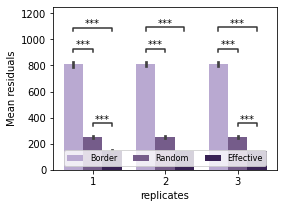

In [58]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.4"

residuals_1rep = np.loadtxt(data_dir+'residuals-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, fig_dir=figures_dir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:1.091e-251 t=3.393e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.892e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:3.579e-234 t=3.271e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.826e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.826e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=7.090e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.965e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.984e+01


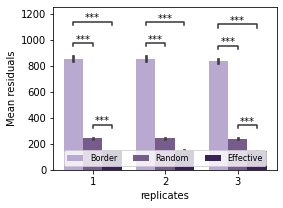

In [59]:
# 12 doses (part of the supplement)
fig_name = "-1-2-3-12doses-dil4-half-columns-neg-controls-0.4"

residuals_1rep = np.loadtxt(data_dir+'residuals-24-12-dil4-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-12-12-dil4-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-8-12-dil4-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, y_max=1250, fig_dir=figures_dir)


### Manuscript
Figure 2b

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-12 < p <= 1.00e-04
      **: 1.00e-43 < p <= 1.00e-12
     ***: p <= 1.00e-43

3_Random vs. 3_Effective: t-test independent samples, P_val:4.909e-242 t=3.326e+01
3_Border vs. 3_Random: t-test independent samples, P_val:0.000e+00 t=5.541e+01
1_Random vs. 1_Effective: t-test independent samples, P_val:4.147e-216 t=3.141e+01
1_Border vs. 1_Random: t-test independent samples, P_val:0.000e+00 t=5.540e+01
2_Border vs. 2_Random: t-test independent samples, P_val:0.000e+00 t=5.541e+01
3_Border vs. 3_Effective: t-test independent samples, P_val:0.000e+00 t=6.960e+01
2_Border vs. 2_Effective: t-test independent samples, P_val:0.000e+00 t=6.956e+01
1_Border vs. 1_Effective: t-test independent samples, P_val:0.000e+00 t=6.897e+01


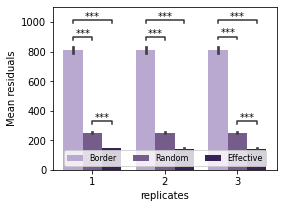

In [60]:
# 8 doses (part of the supplement)
fig_name = "-1-2-3-8doses-dil8-half-columns-neg-controls-0.4_paper"

residuals_1rep = np.loadtxt(data_dir+'residuals-36-8-dil8-1-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_2rep = np.loadtxt(data_dir+'residuals-18-8-dil8-2-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')
residuals_3rep = np.loadtxt(data_dir+'residuals-12-8-dil8-3-0.4-20220413-right-half-neg-control-log-new-reg.csv', delimiter=',', dtype='str')

util.plot_barplot_residuals_data(residuals_1rep, residuals_2rep, residuals_3rep, fig_name, fig_dir=figures_dir)


# The End! 